## Train your first neural network: basic classification
https://www.tensorflow.org/tutorials/keras/basic_classification　より

In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# TensorFlowバージョン表示
print(tf.__version__)

1.13.1


## Import the Fashion MNIST dataset
Fashion MNISTのデータセットを使用  
7万枚のグレースケール画像で10カテゴリに分類されている  
全て28 * 28 pixels

In [2]:
# データ取得
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#カテゴリラベル
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#学習データ　今回の場合は60000枚、28*28ピクセルのデータを使用
train_images.shape

(60000, 28, 28)

In [5]:
#学習データ　の枚数のみ取得
len(train_labels)

60000

In [6]:
#学習データ(教師データ)　番号はラベル番号 0始まり
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
#testデータ詳細　10000枚のデータで検証する
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

### 前処理
データは学習前に前処理する必要がある  
最初の画像を調べると、ピクセル値が0から255の範囲にあることが確認できる

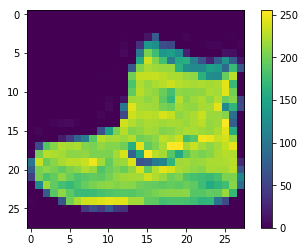

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

ピクセル値を0から1の値にする　　

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

トレーニングセットの最初の25枚の画像を表示  
データが正しい形式であることを確認  

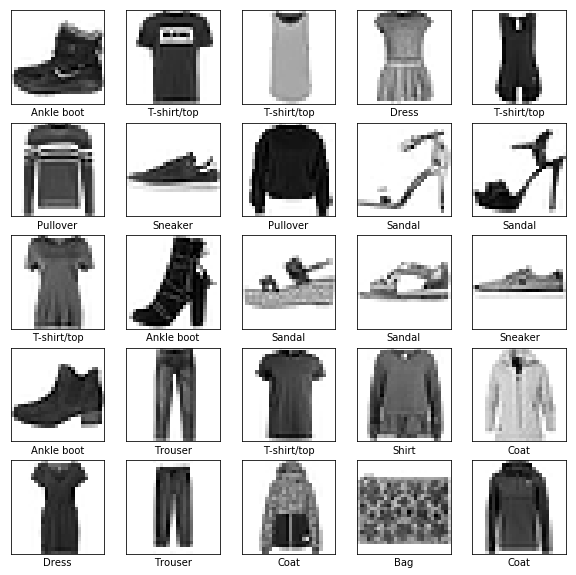

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### モデルを構築する
中間層には128個  
出力層は10個  
10個の確率スコアの配列を返す(ソフトマックス関数)

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
#モデルを構築する 
#目的関数、最適化方法、精度を選択
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### モデルを学習する
今回は5回繰り替えす

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.5030 - acc: 0.8227
Epoch 2/5
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3802 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.3434 - acc: 0.8754
Epoch 4/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.3187 - acc: 0.8834
Epoch 5/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3009 - acc: 0.8878


### モデルの検証
テストデータで精度を確認

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3540 - acc: 0.8725
Test accuracy: 0.8725


In [16]:
#それぞれの画像ごとの精度を計算
predictions = model.predict(test_images)

In [17]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

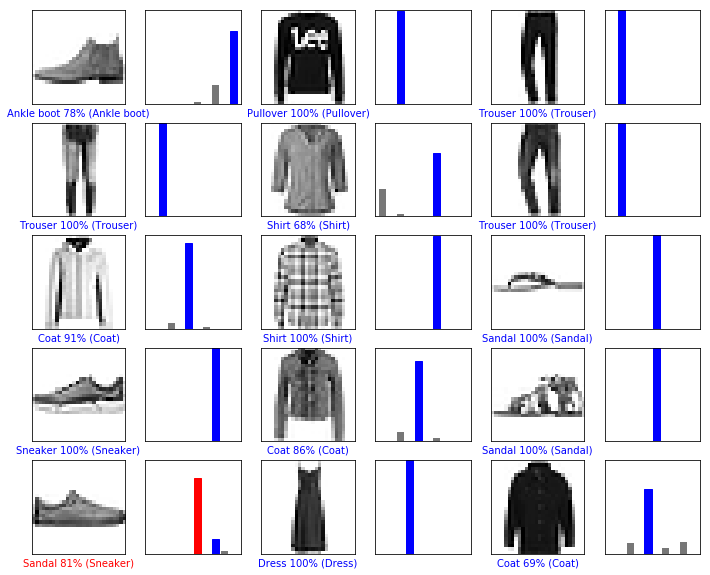

In [18]:
#はじめの15個ののデータについて表示(青は正解、赤は不正解)
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()